In [34]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import os

# State House Special Election

In [2]:
cd ../../

/Users/lilyfalk/sandbox/pdv-va


In [35]:
final = gpd.read_file('./vest_va_2016/va_2016_statehouse_special/va_2016_statehouse_special.shp')
final.head()

,COUNTYFP,LOCALITY,VTDST,PRECINCT,HOD_DIST,S16HODDEM,S16HODREP,S16HODWRI,geometry
0,095,James City County,000101,Berkeley A,093,1109,1681,14,"POLYGON Z ((-76.82290 37.23270 0.00000, -76.81..."
1,095,James City County,000201,Jamestown A,093,490,409,3,"POLYGON Z ((-76.75462 37.26158 0.00000, -76.75..."
2,095,James City County,000501,Roberts A,093,860,608,3,"POLYGON Z ((-76.65883 37.20304 0.00000, -76.64..."
3,095,James City County,000502,Roberts B,093,914,1727,6,"POLYGON Z ((-76.70027 37.24874 0.00000, -76.70..."
4,095,James City County,000503,Roberts C,093,327,194,3,"POLYGON Z ((-76.68089 37.26080 0.00000, -76.68..."


# Raw Election Results
#### Special House elections in VA in Districts 77 and 93 in 2016

### District 77

In [36]:
df77 = pd.read_csv('./vest_va_2016/Virginia_Elections_Database__2016_House_of_Delegates_General_Election_District_77_including_precincts.csv')
df77.head()

,County/City,Ward,Pct,"Clifton Eugene Hayes, Jr",All Others,Total Votes Cast
0,NaN,NaN,NaN,Democratic,NaN,NaN
1,Chesapeake City,-,3 - Camelot,"1,831",27.0,"1,858"
2,Chesapeake City,-,5 - Crestwood,"1,394",35.0,"1,429"
3,Chesapeake City,-,8 - South Norfolk Recreation,"1,405",77.0,"1,482"
4,Chesapeake City,-,10 - Oscar Smith,647,47.0,694


In [37]:
#Create dictionary using VEST's file for county name to county fips to apply to df which by default does not have fips
county_dict = pd.Series(final['COUNTYFP'].values, index = final['LOCALITY']).to_dict()
#Format df to match VESTs
df77 = df77.iloc[1:]
df77 = df77.drop(['Ward'], axis = 1)
df77['HOD_DIST'] = '77'
column_dict = {'County/City': 'LOCALITY', 'Clifton Eugene Hayes, Jr': 'S16HODDEM', 
               'All Others': 'S16HODWRI',
              'Michael Paul Mullin': 'S16HODDEM', 'Heather Lynn Cordasco': 'S16HODREP'
              }

df77['LOCALITY'] = df77['County/City']
df77['S16HODDEM'] = df77['Clifton Eugene Hayes, Jr']
df77['S16HODWRI'] = df77['All Others']
df77 = df77.drop(['County/City', 'Clifton Eugene Hayes, Jr', 'All Others'], axis = 1)

df77['COUNTYFP'] = df77['LOCALITY'].map(county_dict)

df77['S16HODDEM'] = df77['S16HODDEM'].map(lambda x: str(x).replace(',', '')).astype(str).astype(float).astype(int)
df77['S16HODWRI'] = df77['S16HODWRI'].map(lambda x: str(x).replace(',', '')).astype(str).astype(float).astype(int)

df77.head()

,Pct,Total Votes Cast,HOD_DIST,LOCALITY,S16HODDEM,S16HODWRI,COUNTYFP
1,3 - Camelot,"1,858",77,Chesapeake City,1831,27,550
2,5 - Crestwood,"1,429",77,Chesapeake City,1394,35,550
3,8 - South Norfolk Recreation,"1,482",77,Chesapeake City,1405,77,550
4,10 - Oscar Smith,694,77,Chesapeake City,647,47,550
5,12 - Georgetown,"1,253",77,Chesapeake City,1217,36,550


### District 93

In [38]:
df93 = pd.read_csv('./vest_va_2016/Virginia_Elections_Database__2016_House_of_Delegates_General_Election_District_93_including_precincts.csv')
df93.head()

,County/City,Ward,Pct,Michael Paul Mullin,Heather Lynn Cordasco,All Others,Total Votes Cast
0,NaN,NaN,NaN,Democratic,Republican,NaN,NaN
1,James City County,-,101 - Berkeley A,886,"1,383",9.0,"2,278"
2,James City County,-,104- Berkeley D,324,341,1.0,666
3,James City County,-,201 - Jamestown A,391,337,2.0,730
4,James City County,-,501 - Roberts A,687,500,2.0,"1,189"


In [39]:
#Format df to match VESTs
print(df93['County/City'].nunique())
df93 = df93.iloc[1:]
df93['HOD_DIST'] = '93'
df93['LOCALITY'] = df93['County/City']
df93['S16HODDEM'] = df93['Michael Paul Mullin']
df93['S16HODREP'] = df93['Heather Lynn Cordasco']
df93['S16HODWRI'] = df93['All Others']
df93 = df93.drop(['County/City', 'Michael Paul Mullin', 'Heather Lynn Cordasco', 'All Others', 'Ward'], axis = 1)

df93['COUNTYFP'] = df93['LOCALITY'].map(county_dict)
print(df93['COUNTYFP'].nunique())

df93['S16HODDEM'] = df93['S16HODDEM'].map(lambda x: str(x).replace(',', '')).astype(str).astype(float).astype(int)
df93['S16HODREP'] = df93['S16HODREP'].map(lambda x: str(x).replace(',', '')).astype(str).astype(float).astype(int)
df93['S16HODWRI'] = df93['S16HODWRI'].map(lambda x: str(x).replace(',', '')).astype(str).astype(float).astype(int)

5
4


## Districts 77 and 93 together

In [40]:
elections = []
elections.append(df77)
elections.append(df93)
df = pd.concat(elections, axis = 0)

df = df[df['LOCALITY'] != 'TOTALS']

df = df.reset_index()

### County vote total check

In [41]:
column_list = ['S16HODDEM', 'S16HODWRI', 'S16HODREP']

for val in column_list:
    vote_dif = df[val].sum()-final[val].sum()
    if (vote_dif == 0):
        print(val+": EQUAL")
    else:
        print(val+": DIFFERENCE OF " + str(vote_dif)+ " VOTES")

S16HODDEM: EQUAL
S16HODWRI: EQUAL
S16HODREP: EQUAL


In [43]:
print("Counties with differences printed below:")
diff_counties=[]
for i in column_list:
    diff = df.groupby(['COUNTYFP']).sum()[i]-final.groupby(['COUNTYFP']).sum()[i]
    for val in diff[diff != 0].index.values.tolist():
        if val not in diff_counties:
            diff_counties.append(val)
    if len(diff[diff != 0]!=0):
        print(diff[diff != 0].to_string(header=False))
print("")
print("All other races in all counties are equal")

Counties with differences printed below:

All other races in all counties are equal


## Reallocate Absentee Votes

In [44]:
df = df.fillna(0)

absentee_and_prov = df[(df['Pct'].map(lambda x: 'Absentee' in str(x))) | (df['Pct'].map(lambda x: 'Provisional' in str(x)))]

groupby_absentee_and_prov_tot = absentee_and_prov.groupby(['COUNTYFP']).sum()

groupby_county_df_tot = df.groupby(['COUNTYFP']).sum()
df_no_absent_or_provisional = df[(df['Pct'].map(lambda x: 'Absentee' not in str(x))) & (df['Pct'].map(lambda x: 'Provisional' not in str(x)))
                                & (df['LOCALITY'] != 'TOTALS')]
groupby_county_tot_no_absentee = df_no_absent_or_provisional.groupby('COUNTYFP').sum()

In [45]:
df_with_absentee_reallocated = df_no_absent_or_provisional.copy()
groupby_absentee_and_prov_tot.reset_index(inplace=True,drop=False)
groupby_county_tot_no_absentee.reset_index(inplace=True,drop=False)

to_dole_out_totals = groupby_absentee_and_prov_tot.copy()
precinct_specific_totals = groupby_county_tot_no_absentee.copy()

## PH CODE for vote allocation

#countyfp_cd
#df_no_absent_or_provisional

#Create some new columns for each of these races to deal with the allocation
for race in column_list:
    add_var = race+"_add"
    rem_var = race+"_rem"
    floor_var = race+"_floor"
    df_with_absentee_reallocated.loc[:,add_var]=0.0
    df_with_absentee_reallocated.loc[:,rem_var]=0.0
    df_with_absentee_reallocated.loc[:,floor_var]=0.0

#Iterate over the rows
#Note this function iterates over the dataframe two times so the rounded vote totals match the totals to allocate
for index, row in df_no_absent_or_provisional.iterrows():
    for race in column_list:
        add_var = race+"_add"
        rem_var = race+"_rem"
        floor_var = race+"_floor"
        #Grab the district
        county_id = row['COUNTYFP']
        #Get the denominator for the allocation (the precinct vote totals)
        denom = precinct_specific_totals.loc[precinct_specific_totals['COUNTYFP']==county_id][race]
        #Get one of the numerators, how many districtwide votes to allocate
        numer = to_dole_out_totals.loc[to_dole_out_totals['COUNTYFP']==county_id][race]
        #Get the vote totals for this race in this precinct
        val = df_with_absentee_reallocated.at[index,race]
        #Get the vote share, the precincts % of total precinct votes in the district times votes to allocate
        if ((float(denom)==0)):
            vote_share = 0
        else:
            vote_share = (float(val)/float(denom))*float(numer)
        df_with_absentee_reallocated.at[index,add_var] = vote_share
        #Take the decimal remainder of the allocation
        df_with_absentee_reallocated.at[index,rem_var] = vote_share%1
        #Take the floor of the allocation
        df_with_absentee_reallocated.at[index,floor_var] = np.floor(vote_share)

#After the first pass through, get the sums of the races by district to assist in the rounding            
first_allocation = pd.DataFrame(df_with_absentee_reallocated.groupby(['COUNTYFP']).sum())

#Now we want to iterate district by district to work on rounding
county_list = list(to_dole_out_totals['COUNTYFP'].unique()) 

#Iterate over the district
for county in county_list:
    for race in column_list:
        add_var = race+"_add"
        rem_var = race+"_rem"
        floor_var = race+"_floor"
        #County how many votes still need to be allocated (because we took the floor of all the initial allocations)
        to_go = int(np.round((int(to_dole_out_totals.loc[to_dole_out_totals['COUNTYFP']==county][race])-first_allocation.loc[first_allocation.index==county,floor_var])))
        #Grab the n precincts with the highest remainders and round these up, where n is the # of votes that still need to be allocated
        for index in df_with_absentee_reallocated.loc[df_with_absentee_reallocated['COUNTYFP']==county][rem_var].nlargest(to_go).index:
            df_with_absentee_reallocated.at[index,add_var] = np.ceil(df_with_absentee_reallocated.at[index,add_var])

#Iterate over every race again
for race in column_list:
    add_var = race+"_add"
    #Round every allocation down to not add fractional votes
    df_with_absentee_reallocated.loc[:,add_var]=np.floor(df_with_absentee_reallocated.loc[:,add_var])
    df_with_absentee_reallocated.loc[:,race]+=df_with_absentee_reallocated.loc[:,add_var]

In [46]:
for val in column_list:
    vote_dif = df_with_absentee_reallocated[val].sum()-final[val].sum()
    if (vote_dif == 0):
        print(val+": EQUAL")
    else:
        print(val+": DIFFERENCE OF " + str(vote_dif)+ " VOTES")
        
        
print("Counties with differences printed below:")
diff_counties=[]
for i in column_list:
    diff = df_with_absentee_reallocated.groupby(['LOCALITY']).sum()[i]-final.groupby(['LOCALITY']).sum()[i]
    for val in diff[diff != 0].index.values.tolist():
        if val not in diff_counties:
            diff_counties.append(val)
    if len(diff[diff != 0]!=0):
        print(diff[diff != 0].to_string(header=False))
print("")
print("All other races in all counties are equal")

S16HODDEM: EQUAL
S16HODWRI: EQUAL
S16HODREP: EQUAL
Counties with differences printed below:

All other races in all counties are equal


### Create unique id to enable merge

In [47]:
#Function to format 3 digit VTDST code pulled from df
def vtdst_changer(vtdst):
    if (vtdst[1:3] == ' -'):
        two_lead_zero = '00' + vtdst[:1]
        return two_lead_zero
    elif (vtdst[1:3] == '- '):
        two_lead_zero = '00' + vtdst[:1]
        return two_lead_zero
    elif (vtdst[-1:] == ' '):
        one_lead_zero = '0' + vtdst[:2]
        return one_lead_zero
    elif (vtdst[-1:] == '-'):
        one_lead_zero = '0' + vtdst[:2]
        return one_lead_zero
    else:
        return vtdst

In [48]:
df_with_absentee_reallocated['vtdst'] = df_with_absentee_reallocated.Pct.str.slice(stop = 3)
df_with_absentee_reallocated['vtdst'] = df_with_absentee_reallocated['vtdst'].apply(vtdst_changer)
#Assign unique_id
df_with_absentee_reallocated['unique_id'] = df_with_absentee_reallocated['COUNTYFP'] + df_with_absentee_reallocated['vtdst']
final['unique_id'] = final.COUNTYFP + final.VTDST.str.slice(start = 3)

print('unique ids in df not in VEST file: ', set(df_with_absentee_reallocated.unique_id) - set(final.unique_id))
print('unique ids in VEST file not in df: ', set(final.unique_id) - set(df_with_absentee_reallocated.unique_id))

unique ids in df not in VEST file:  set()
unique ids in VEST file not in df:  set()


# Shapefile

<AxesSubplot:>

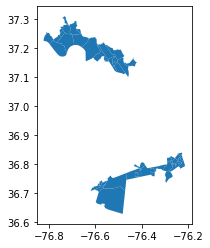

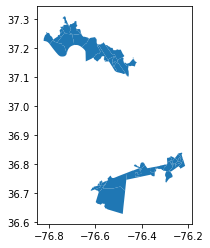

In [49]:
county_fips = []
for directory in os.listdir('./vest_va_2016/census_shps_by_county_all_unzip/'):
    if not directory[0] == '.':
        county_fips.append(directory[-5:])
        
proj = final.crs   

county_vtds = []
for i in county_fips: #i dont have fips_codes file
    ref = './vest_va_2016/census_shps_by_county_all_unzip/partnership_shapefiles_19v2_'
    vtd_ref = ref + i + '/PVS_19_v2_vtd_' + i + '.shp' 
    vtd_shp = gpd.read_file(vtd_ref)
    #print(i, ' added to list')
    county_vtds.append(vtd_shp)

global shp_vtd
shp_vtd = gpd.GeoDataFrame(pd.concat(county_vtds, axis = 0) , crs = proj) 

county_sldl = []
for i in county_fips: #i dont have fips_codes file
    ref = './vest_va_2016/census_shps_by_county_all_unzip/partnership_shapefiles_19v2_'
    sldl_ref = ref + i + '/PVS_19_v2_sldl_' + i + '.shp' #PVS_19_v2_sldl_51650
    sldl_shp = gpd.read_file(sldl_ref)
    #print(i, ' added to list')
    county_sldl.append(sldl_shp)

global shp_sldl
shp_sldl = gpd.GeoDataFrame(pd.concat(county_sldl, axis = 0) , crs = proj) 

overlay = gpd.overlay(shp_sldl, shp_vtd, how='intersection', make_valid=True, keep_geom_type=True)
shp = overlay[(overlay.SLDLST == '077') | (overlay.SLDLST == '093')]

shp.plot()
final.plot()

unique id in shp not in vest file:  {'095042', '800304', '199201', '550058', '550064', '095041', '550033', '550006'}
unique id in vest file not in shp:  {'700211', '095104'}


/Users/lilyfalk/anaconda3/envs/pdv_env/lib/python3.9/site-packages/geopandas/geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


<AxesSubplot:>

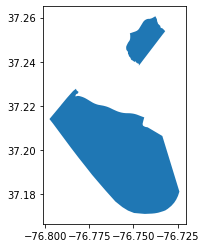

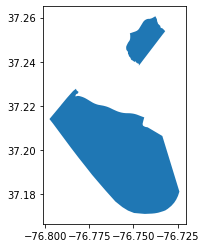

In [50]:
print('unique id in shp not in vest file: ', (set(shp.COUNTYFP_1 + shp.VTDST.str.slice(start = 3)) - set(final.COUNTYFP + final.VTDST.str.slice(start = 3))))
print('unique id in vest file not in shp: ', (set(final.COUNTYFP + final.VTDST.str.slice(start = 3)) - set(shp.COUNTYFP_1 + shp.VTDST.str.slice(start = 3))))
#assign unique id format from above to shp:
shp['unique_id'] = shp['COUNTYFP_1'] + shp['VTDST'].str.slice(start = 3)
#Check out mismatches that can be matched
shp[(shp['unique_id'] == '095041') | (shp['unique_id'] == '095042')].plot()
final[final['unique_id'] == '095104'].plot()

In [51]:
#Dictionary to remedy the above mismatches
id_095_dict = {'095041': '095104', '095042': '095104'}

shp.loc[shp['unique_id'].isin(id_095_dict.keys()), 'unique_id'] = shp.loc[shp['unique_id'].isin(id_095_dict.keys()), 'unique_id'].map(id_095_dict)
#merge geometries that repeat
shp = shp.dissolve(by = 'unique_id', as_index = False)

print('unique id in shp not in vest file: ', (set(shp.unique_id) - set(final.unique_id)))
print('unique id in vest file not in shp: ',(set(final.unique_id) - set(shp.unique_id)))

unique id in shp not in vest file:  {'800304', '199201', '550058', '550064', '550033', '550006'}
unique id in vest file not in shp:  {'700211'}


/Users/lilyfalk/anaconda3/envs/pdv_env/lib/python3.9/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [65]:
shp['NAMELSAD_2'][shp.unique_id.isin(list(set(shp.unique_id) - set(final.unique_id)))]

7          COVENTRY Voting District
13       Deep Creek Voting District
27         Westover Voting District
31       Expressway Voting District
32    Deep Creek II Voting District
43                  NANSEMOND RIVER
Name: NAMELSAD_2, dtype: object

In [52]:
#See the description of the id in vest file not shp
final[final.unique_id == '700211']

,COUNTYFP,LOCALITY,VTDST,PRECINCT,HOD_DIST,S16HODDEM,S16HODREP,S16HODWRI,geometry,unique_id
45,700,Newport News City,000211,Palmer,093,86,65,1,"POLYGON Z ((-76.46814 37.11123 0.00000, -76.46...",700211


### Join election results and shapefile

<AxesSubplot:>

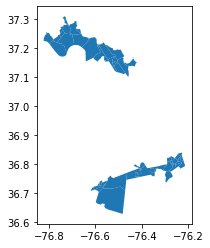

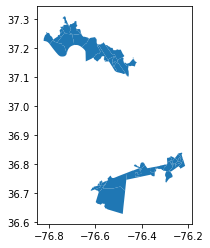

In [53]:
join = gpd.GeoDataFrame(pd.merge(df_with_absentee_reallocated, shp, on = 'unique_id', how = 'outer'), crs = proj)
join.plot()
final.plot()

# Validation

## Validating Shapefile

Here, I merge the shp joined to the election results to the final vest file to compare

In [54]:
final.shape

(46, 10)

In [55]:
shp_final_merge = pd.merge(join, final, on = 'unique_id', how = 'outer', suffixes = ['_x', '_y'],indicator=True)

join['geometry'].geom_almost_equals(final['geometry'], decimal = 0)

shp_shapes = gpd.GeoDataFrame(shp_final_merge, geometry = 'geometry_x')
final_shapes = gpd.GeoDataFrame(shp_final_merge, geometry = 'geometry_y')
vals = shp_shapes.geom_almost_equals(final_shapes, decimal = 0)

/Users/lilyfalk/anaconda3/envs/pdv_env/lib/python3.9/site-packages/geopandas/base.py:32: UserWarning: The indices of the two GeoSeries are different.
  warn("The indices of the two GeoSeries are different.")


In [56]:
both = shp_final_merge[shp_final_merge["_merge"]=="both"]
source_geoms = gpd.GeoDataFrame(both,geometry="geometry_x",crs=final.crs)
vest_geoms = gpd.GeoDataFrame(both,geometry="geometry_y",crs=final.crs)
source_geoms = source_geoms.to_crs(3857)
vest_geoms = vest_geoms.to_crs(3857)
source_geoms["geometry_x"]=source_geoms.buffer(0)
vest_geoms["geometry_y"]=vest_geoms.buffer(0)
vals = source_geoms.geom_almost_equals(vest_geoms,decimal=0)
print(vals.value_counts())

False    44
True      2
dtype: int64


In [57]:
count = 0
area_list = []
big_diff = pd.DataFrame(columns=["area"])
for i in range(0,len(source_geoms)):
    diff = source_geoms.iloc[[i]].symmetric_difference(vest_geoms.iloc[[i]])
    intersection = source_geoms.iloc[[i]].intersection(vest_geoms.iloc[[i]])
    area = float(diff.area/10e6)
    area_list.append(area)
    #print("Area is " + str(area))

    if (area > 1):
        count += 1
        name = source_geoms.at[i,"Pct"]
        big_diff.loc[name]=area
        print(str(count)+") For " + name + " difference in area is " + str(area))
        if (intersection.iloc[0].is_empty):
            base = diff.plot(color="red")
            source_geoms.iloc[[i]].plot(color="orange",ax=base)
            vest_geoms.iloc[[i]].plot(color="blue",ax=base)
            base.set_title(name)
        else:
            base = diff.plot(color="red")
            source_geoms.iloc[[i]].plot(color="orange",ax=base)
            vest_geoms.iloc[[i]].plot(color="blue",ax=base)
            intersection.plot(color="green",ax=base)
            base.set_title(name)

In [58]:
df = pd.DataFrame(area_list)
print(df.shape)

print(str(len(df[df[0]==0]))+" precincts w/ a difference of 0 km^2")
print(str(len(df[(df[0]<.1) & (df[0]>0)]))+ " precincts w/ a difference between 0 and .1 km^2")
print(str(len(df[(df[0]<.5) & (df[0]>=.1)]))+ " precincts w/ a difference between .1 and .5 km^2")
print(str(len(df[(df[0]<1) & (df[0]>=.5)]))+ " precincts w/ a difference between .5 and 1 km^2")
print(str(len(df[(df[0]<2) & (df[0]>=1)]))+ " precincts w/ a difference between 1 and 2 km^2")
print(str(len(df[(df[0]<5) & (df[0]>=2)]))+ " precincts w/ a difference between 2 and 5 km^2")
print(str(len(df[(df[0]>=5)]))+ " precincts w/ a difference greater than 5 km^2")

(46, 1)
31 precincts w/ a difference of 0 km^2
12 precincts w/ a difference between 0 and .1 km^2
2 precincts w/ a difference between .1 and .5 km^2
0 precincts w/ a difference between .5 and 1 km^2
0 precincts w/ a difference between 1 and 2 km^2
0 precincts w/ a difference between 2 and 5 km^2
0 precincts w/ a difference greater than 5 km^2


## Validating Election Results

In [59]:
def validater_row (df, column_List):
    matching_rows = 0
    different_rows = 0
    diff_list=[]
    diff_values = []
    max_diff = 0
    for j in range(0,len(df.index)):
        same = True
        for i in column_List:
            left_Data = i + "_x"
            right_Data = i + "_y"
            diff = abs(df.iloc[j][left_Data]-df.iloc[j][right_Data])
            if(diff >0):
                if(diff>0):
                    print(i, "{:.>72}".format(df.iloc[j]["unique_id"]), "(V)","{:.>5}".format(int(df.iloc[j][right_Data]))," (S){:.>5}".format(int(df.iloc[j][left_Data])),"(D):{:>5}".format(int(df.iloc[j][right_Data])-int(df.iloc[j][left_Data])))           
                #print(df.iloc[j]['countypct'])
                
                diff_values.append(abs(diff))
                same = False
                if(np.isnan(diff)):
                    print("NaN value at diff is: ", df.iloc[j]["unique_id"])
                    print(df.iloc[j][left_Data])
                    print(df.iloc[j][right_Data])
                if (diff>max_diff):
                    max_diff = diff
                    #print("New max diff is: ", str(max_diff))
                    #print(df.iloc[j]['cty_pct'])
        if(same != True):
            different_rows +=1
            diff_list.append(df.iloc[j]["unique_id"])
        else:
            matching_rows +=1
    print("")
    print("There are ", len(df.index)," total rows")
    print(different_rows," of these rows have election result differences")
    print(matching_rows," of these rows are the same")
    print("")
    print("The max difference between any one shared column in a row is: ", max_diff)
    if(len(diff_values)!=0):
        print("The average difference is: ", str(sum(diff_values)/len(diff_values)))
    count_big_diff = len([i for i in diff_values if i > 10])
    print("There are ", str(count_big_diff), "precinct results with a difference greater than 10")
    diff_list.sort()
    print(diff_list)

In [61]:
column_list = ['S16HODDEM', 'S16HODREP', 'S16HODWRI']
final_join_merge = pd.merge(join, final, on = 'unique_id', how = 'outer', suffixes = ['_x', '_y'])
validater_row(final_join_merge, column_list)

S16HODDEM ..................................................................550003 (V) .2112  (S).2111 (D):    1
S16HODDEM ..................................................................550005 (V) .1607  (S).1608 (D):   -1
S16HODDEM ..................................................................550025 (V) ..728  (S)..729 (D):   -1
S16HODDEM ..................................................................550026 (V) ..749  (S)..748 (D):    1
S16HODDEM ..................................................................550030 (V) ..914  (S)..913 (D):    1
S16HODDEM ..................................................................550031 (V) .1766  (S).1767 (D):   -1
S16HODDEM ..................................................................550032 (V) .2117  (S).2116 (D):    1
S16HODDEM ..................................................................550048 (V) .1795  (S).1796 (D):   -1
S16HODDEM ..................................................................800302 (V) .1489  (S